In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import pandas as pd
import numpy as np

# Observed Variability of the North Atlantic Current in the Rockall Trough From 4 Years of Mooring Measurements

>  Houpert, L., S. Cunningham, N. Fraser, C. Johnson, N. P. Holliday, S. Jones, B. Moat, and D. Rayner. “Observed Variability of the North Atlantic Current in the Rockall Trough From 4 Years of Mooring Measurements.” Journal of Geophysical Research: Oceans 125, no. 10 (2020): e2020JC016403. Accessed November 9, 2020. https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/2020JC016403.

>There is mounting evidence that the North Atlantic Current (eastward extension of the Gulf Stream) heavily influences the European and Arctic climate. To adequately measure this current and understand its dynamics, an array of underwater instruments was deployed in the Rockall Trough, a remote region of the eastern North Atlantic. Over a 4‐year period, these instruments continuously collected measurements of temperature, salinity, pressure, and velocity data. Analysis of these data provides a new and more accurate description of the North Atlantic Current in this region. This study reveals a surprisingly large variability in the eastern North Atlantic circulation. The combined analysis of underwater measurements and satellite data indicates that this variability is due to changes of the North Atlantic Current system.

Using moorings and gliders, CTD and ADCP measurements were made along the "Rockall Trough Mooring Array" and used to estimate the transport through this region. 

Mooring data for this papers is available through the BODC as well as other reanalysis data products. This is a large dataset that is beyond the scope of the course to attempt to reanalyze.

The lead author has made available the transports in this region as a time series.  https://github.com/lhoupert/article_2020_NAC_JGR

In [3]:
url = "https://raw.githubusercontent.com/lhoupert/article_2020_NAC_JGR/master/data/2014-2018_90dLP_RockallTransport.csv"              
df = pd.read_csv(url)

In [4]:
df.head()

,Year,Month,Day,Hour,Days since January 0 0000,Total Rockall Trough Transport (Sv),Eastern Wedge Transport (Sv),Western Wedge Transport (Sv),Mid-Basin Transport (Sv)
0,2014,6,1,0,735750.0,NaN,0.63294,-0.039768,NaN
1,2014,6,1,12,735750.0,NaN,0.63334,-0.036279,NaN
2,2014,6,2,0,735750.0,NaN,0.63351,-0.032691,NaN
3,2014,6,2,12,735750.0,NaN,0.63343,-0.029010,NaN
4,2014,6,3,0,735750.0,NaN,0.63311,-0.025239,NaN


Column names of spaces in them; we need to strip those out.

In [5]:
df.columns

Index(['Year', ' Month', ' Day', ' Hour', ' Days since January 0 0000',
       ' Total Rockall Trough Transport (Sv)', ' Eastern Wedge Transport (Sv)',
       ' Western Wedge Transport (Sv)', ' Mid-Basin Transport (Sv)'],
      dtype='object')

In [6]:
df = df.rename(columns=lambda x: x.strip())

Convert the columns for *Year, Month, Day,* and *Hour* to a `DatetimeIndex`

In [7]:
index = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']])
df = df.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Days since January 0 0000'])
df = df.set_index(index)

Clean up the column names to not include the units (Sv)

In [8]:
df = df.rename(columns=lambda x: x.replace(' Transport (Sv)', ''))

In [9]:
df = df.dropna()

In [10]:
df.tail()

,Total Rockall Trough,Eastern Wedge,Western Wedge,Mid-Basin
2018-07-08 00:00:00,5.2972,0.065668,-0.19898,5.4305
2018-07-08 12:00:00,5.2972,0.065666,-0.19897,5.4305
2018-07-09 00:00:00,5.2972,0.065665,-0.19897,5.4305
2018-07-09 12:00:00,5.2972,0.065664,-0.19897,5.4305
2018-07-10 00:00:00,5.2972,0.065664,-0.19896,5.4305


In summary,

In [11]:
def load_dataset(url):
    
    df = pd.read_csv(url)
    df = df.rename(columns=lambda x: x.strip())
    df = df.rename(columns=lambda x: x.replace(' Transport (Sv)', ''))
    df['time'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']])
    df = df.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Days since January 0 0000'])

    return df

We need both the transports and the RMSE values.

In [12]:
url1 = "https://raw.githubusercontent.com/lhoupert/article_2020_NAC_JGR/master/data/2014-2018_90dLP_RockallTransport.csv"              
df1 = load_dataset(url1)
url2 = "https://raw.githubusercontent.com/lhoupert/article_2020_NAC_JGR/master/data/2014-2018_90dLP_RockallRMSE.csv"              
df2 = load_dataset(url2)

In [13]:
df = pd.merge(df1, df2, on='time')
df = df.set_index('time')

Finally, let's only consider the subset of times where there is data for the total transport.

In [14]:
df = df.dropna()
df

,Total Rockall Trough,Eastern Wedge,Western Wedge,Mid-Basin,RMSE Total,RMSE Eastern Wedge,RMSE Western Wedge,RMSE Mid-Basin
time,,,,,,,,
2014-07-21 12:00:00,5.7756,-0.606050,-0.70697,7.0886,1.08460,0.58856,0.63151,0.65661
2014-07-22 00:00:00,5.7301,-0.620750,-0.74241,7.0932,1.08460,0.58856,0.63151,0.65661
2014-07-22 12:00:00,5.6844,-0.635100,-0.77865,7.0982,1.08460,0.58856,0.63151,0.65661
2014-07-23 00:00:00,5.6387,-0.649100,-0.81570,7.1035,1.08460,0.58856,0.63151,0.65661
2014-07-23 12:00:00,5.5929,-0.662730,-0.85354,7.1092,1.08460,0.58856,0.63151,0.65661
...,...,...,...,...,...,...,...,...
2018-07-02 12:00:00,5.2969,0.065751,-0.19921,5.4304,0.90806,0.58856,0.63151,0.28172
2018-07-03 00:00:00,5.2970,0.065734,-0.19916,5.4304,0.90806,0.58856,0.63151,0.28172
2018-07-03 12:00:00,5.2970,0.065721,-0.19912,5.4304,0.90806,0.58856,0.63151,0.28172


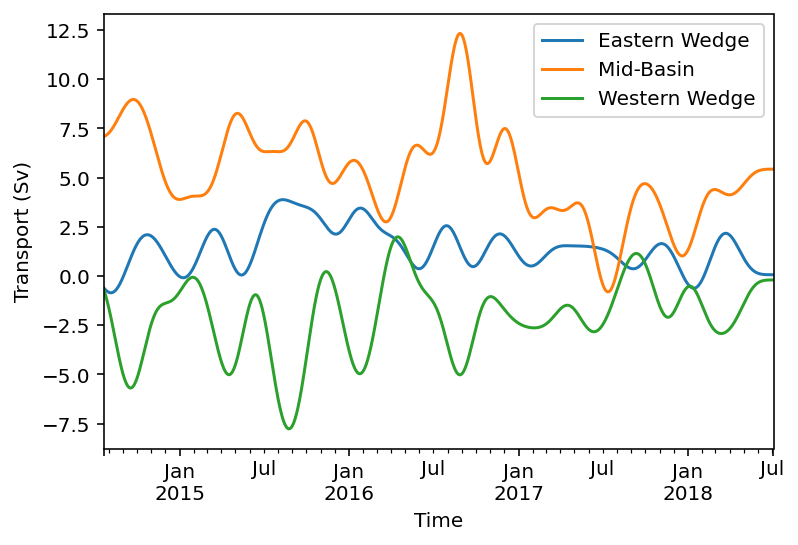

In [15]:
df['Eastern Wedge'].plot()
df['Mid-Basin'].plot()
df['Western Wedge'].plot()
plt.xlabel('Time')
plt.ylabel('Transport (Sv)')
plt.legend()

The sections "5.1.2 Mean Transports and Variability" and "5.1.3 Trends and Seasonal Cycles" includes several results (tables, figures, confidence interval, etc. ) that would be appropriate to try and reproduce.

> ## 5.1.2 Mean Transports and Variability

> A surprising feature revealed by the Rockall Trough mooring array is the large range of the total transport (24.7 Sv), spanning from −7.4 to 17.3 Sv in the 40‐h low‐pass‐filtered time series. The total transport variability is dominated by the midbasin and western wedge transport time series (Figure 4). To focus attention on subannual and interannual timescales, we used a third‐order Butterworth filter with a cutoff period of 90 days to filter the transport time series following (Bower & von Appen, 2008). For the rest of this study, we focus on the 90‐day low‐pass‐filtered transport time series, which spans from −1.6 to 9.1 Sv (range of 10.7 Sv). 
>

<img width=550 src="https://agupubs.onlinelibrary.wiley.com/cms/asset/5d4d7d78-a629-4731-85dc-52a76e3ba0c0/jgrc24189-fig-0004-m.jpg"/>

> Figure 4: Time series of 40‐hr (thin lines) and 90‐day (thick lines) low‐pass‐filtered transport for (a) the meridional component of the Ekman transport; (b) the eastern wedge, western wedge, and midbasin; and (c) for the whole section. Shaded areas correspond to the accuracy of the different time series (±1 RMS error, see section 4 for more details). Extrema in transport are indicated by triangle markers on top of the subpanels (the maximum on 15 August 2016 is in red, and the minimum on 6 July 2017 is in blue). The blue/red vertical shaded areas indicate periods of low/high transport, defined as when the total transport is inferior/superior to the mean transport ± one standard deviation. 

The data available on GitHub has already been transformed with a 90-day low-pass filter.  We first make a reproduction of Figure 4 (b, c).

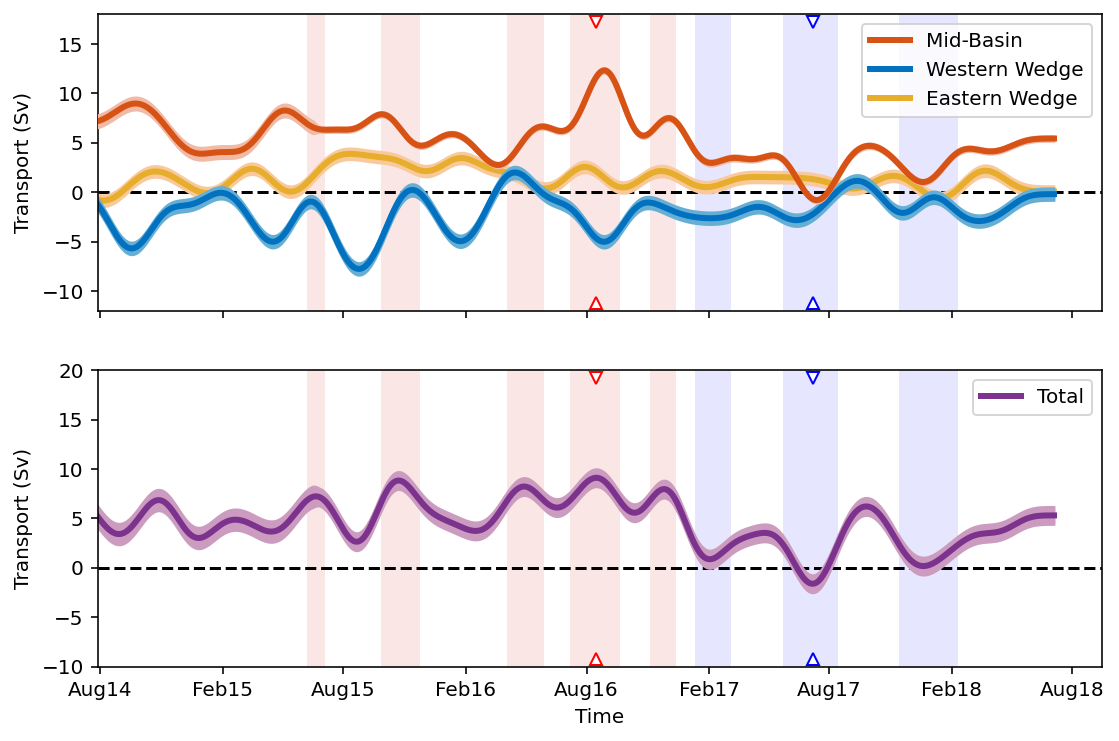

In [16]:
fig, [ax1, ax2] = plt.subplots(nrows=2, sharex=True, figsize=(9,6))

ax1.fill_between(df.index, df['Mid-Basin']-df['RMSE Mid-Basin'], 
                 df['Mid-Basin']+df['RMSE Mid-Basin'], 
                 color='#F1BAA5', zorder=3)
ax1.plot(df.index, df['Mid-Basin'], lw=3,
         color='#D75315', zorder=3, label='Mid-Basin')



ax1.fill_between(df.index, df['Western Wedge']-df['RMSE Western Wedge'], 
                 df['Western Wedge']+df['RMSE Western Wedge'], 
                 color='#65AFD5', zorder=2)
ax1.plot(df.index, df['Western Wedge'], lw=3,
         color='#0171C0', zorder=2, label='Western Wedge')


ax1.fill_between(df.index, df['Eastern Wedge']-df['RMSE Eastern Wedge'], 
                 df['Eastern Wedge']+df['RMSE Eastern Wedge'], 
                 color='#F9C99B', zorder=1)
ax1.plot(df.index, df['Eastern Wedge'], lw=3,
         color='#E7AD2C', zorder=1, label='Eastern Wedge')

ax1.axhline(0, color='k', linestyle='--', zorder=0)
ax1.set_ylim(-12, 18)
ax1.legend()

ax1.set_ylabel('Transport (Sv)')


ax2.fill_between(df.index, df['Total Rockall Trough']-df['RMSE Total'], 
                 df['Total Rockall Trough']+df['RMSE Total'], 
                 color='#CC9CC0', zorder=1)
ax2.plot(df.index, df['Total Rockall Trough'], lw=3,
         color='#7C338D', zorder=1, label='Total')
ax2.set_ylim(-10, 20)
ax2.set_xlim(xmin='2014-07-28')
ax2.set_ylabel('Transport (Sv)')
ax2.set_xlabel('Time')
ax2.axhline(0, color='k', linestyle='--', zorder=0)
ax2.legend()

imin = df['Total Rockall Trough'].argmin()
tmin = df.index[imin]
imax = df['Total Rockall Trough'].argmax()
tmax = df.index[imax]

ax1.plot(tmin, -11.2, '^', color='w', mec='b')
ax1.plot(tmin, 17.2, 'v', color='w', mec='b')
ax2.plot(tmin, -9.2, '^', color='w', mec='b')
ax2.plot(tmin, 19.2, 'v', color='w', mec='b')

ax1.plot(tmax, -11.2, '^', color='w', mec='r')
ax1.plot(tmax, 17.2, 'v', color='w', mec='r')
ax2.plot(tmax, -9.2, '^', color='w', mec='r')
ax2.plot(tmax, 19.2, 'v', color='w', mec='r')


import matplotlib.dates as mdates
ax2.get_xaxis().set_major_locator(mdates.MonthLocator(bymonth=[2, 8]))
ax2.get_xaxis().set_major_formatter(mdates.DateFormatter("%b%y"))


mean_transport = df['Total Rockall Trough'].mean()
std_transport = df['Total Rockall Trough'].std()


def find_bounds(s):
    bounds = []
    dt = s[1] - s[0]  # assume initial interval is at least two elements long
    b = s[0]
    for i, d in enumerate(s):
        if s[i] - s[i-1] > dt:
            bounds.append((b, s[i-1]))
            b = s[i]

    bounds.append((b, s[-1]))
    return bounds

s = df[df['Total Rockall Trough'] > mean_transport + std_transport].index
for (t1, t2) in find_bounds(s):
    ax1.axvspan(t1, t2, color='#FAE6E5', zorder=-1)
    ax2.axvspan(t1, t2, color='#FAE6E5', zorder=-1)

s = df[df['Total Rockall Trough'] < mean_transport - std_transport].index
for (t1, t2) in find_bounds(s):
    ax1.axvspan(t1, t2, color='#E6E6FE', zorder=-1)
    ax2.axvspan(t1, t2, color='#E6E6FE', zorder=-1)
    
plt.show()

In [17]:
min_transport = df['Total Rockall Trough'].min()
max_transport = df['Total Rockall Trough'].max()

print(f'The transport covers the interval {min_transport:.1f} to {max_transport:.1f} Sv, a total range of {max_transport - min_transport:.1f} Sv')

The transport covers the interval -1.6 to 9.1 Sv, a total range of 10.7 Sv


The extrema are added using the red and blue triangle markers on the plot.

To identify times of *high transport* or *low transport* we look for periods where the transports exceed one standard deviation from the mean.

In [18]:
mean_transport = df['Total Rockall Trough'].mean()
std_transport = df['Total Rockall Trough'].std()

In [19]:
s = df[df['Total Rockall Trough'] > mean_transport + std_transport].index

In [20]:
bounds = []
dt = s[1] - s[0]  # assume initial interval is at least two elements long
b = s[0]
for i, d in enumerate(s):
    if s[i] - s[i-1] > dt:
        bounds.append((b, s[i-1]))
        b = s[i]

bounds.append((b, s[-1]))
bounds

[(Timestamp('2015-06-08 12:00:00'), Timestamp('2015-07-02 12:00:00')),
 (Timestamp('2015-09-29 00:00:00'), Timestamp('2015-11-23 12:00:00')),
 (Timestamp('2016-04-04 12:00:00'), Timestamp('2016-05-27 12:00:00')),
 (Timestamp('2016-07-08 00:00:00'), Timestamp('2016-09-18 12:00:00')),
 (Timestamp('2016-11-05 00:00:00'), Timestamp('2016-12-12 12:00:00'))]

> The total transport across the section is mainly northward, with a mean ± one standard deviation of 4.5 ± 2.3 Sv and a standard error on the mean (SE) of 0.8 Sv. The Ekman transport calculated along the section varies from −0.93 to 0.25 Sv, with a mean ± one standard deviation of −0.20 ± 0.21 Sv. This is an order of magnitude smaller than the total transport (Figure 4a), and therefore, the Ekman transport is considered as a negligible contribution to the net meridional transport and is not included.

In [21]:
print(f"Total transport is mean with ± one standard deviation of {mean_transport:.1f} ± {std_transport:.1f} Sv.")

Total transport is mean with ± one standard deviation of 4.5 ± 2.3 Sv.


The paper quotes a standard error of the mean (SE) of "0.8 Sv".  One might be tempted to calculate the standard error as

$$ \frac{\sigma}{\sqrt{N}} $$

where $N$ is the number of observations but that would lead to 

In [22]:
N = len(df)
N

2889

In [23]:
std_transport / np.sqrt(N)

0.0433150639159293

which is clearly too small (compared to the result given in the paper). The issue here is that not all of the total transport observations are uncorrelated from each other. We need to estimate the "effective sample size" to correctly calculate the standard error.

Looking at the details of Table 1, it looks like the authors estimated the autocorrelation time scale and used that to determine effective degrees of freedom to calculate the standard error of the mean.

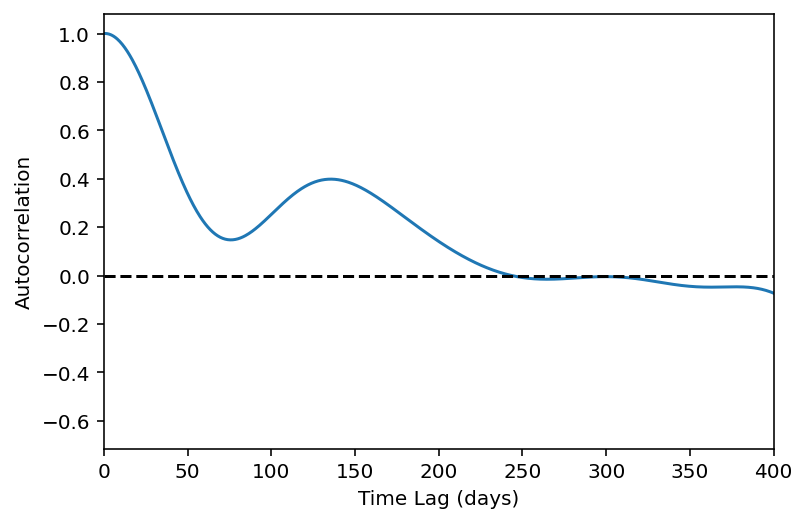

In [24]:
import statsmodels.api as sm
timeseries = df['Total Rockall Trough'].values

C_t = sm.tsa.stattools.acf(timeseries, fft=True, adjusted=True, nlags=timeseries.size)
t = np.arange(timeseries.size)/2 # sample rate is 2/day
plt.plot(t, C_t)
plt.xlabel('Time Lag (days)')
plt.ylabel('Autocorrelation')
plt.axhline(0, color='k', linestyle='--')
plt.xlim(0, 400)
plt.show()

The paper reports an 'Integral Time Scale (ITS)' of 150.1 days for the total transport.   It is not entirely clear what is meant by this (I am familar with the phrase "integral time scale" from turbulence theory rather than statistics). Perhaps it some from fit of monotonically decreasing function and the first x-crossing is determined from that. From this "ITS", the paper calculates an effective degrees of freedom, EDOF, which is essentially a modified $N$ in the usual formula for standard error in the mean.

In [25]:
N = timeseries.size
N

2889

In [26]:
ITS = 150.1 * 2 # days * 2 samples/day
EDOF = N / ITS
EDOF

9.623584277148568

In [27]:
timeseries.std()/np.sqrt(EDOF)

0.7503590537621272

To investigate this further, I found the following write up as a technical article: https://ljmartin.github.io/technical-notes/stats/estimators-autocorrelated/ which was very clear.

In [28]:
import sem_utils

### Block Averaging

Text(0, 0.5, 'SEM')

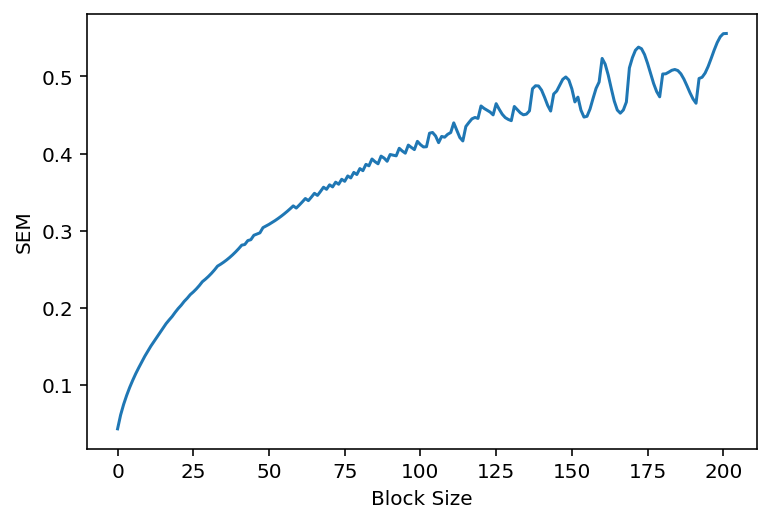

In [29]:
plt.plot(sem_utils.block_averaging(timeseries))
plt.xlabel('Block Size')
plt.ylabel('SEM')

In [30]:
##setup names and estimation functions
method_names = ['Naive', 'BlockAveraging', 'Chodera', 'Sokal']
method_functions = [sem_utils.sem_from_independent,
                    sem_utils.sem_from_blockAveraging,
                    sem_utils.sem_from_chodera,
                    sem_utils.sem_from_sokal]

##setup df to store the results
df_sem = pd.DataFrame(columns=['methodName', 'estMean', 'SEM'])

row_num = 0

##do the measurements:
timeseries = df['Total Rockall Trough'].values
estimated_mean = timeseries.mean()

for methodName, function in zip(method_names, method_functions):
    SEM = function(timeseries)
    results = [methodName, estimated_mean, SEM]
    df_sem.loc[row_num] = results
    row_num += 1

df_sem

,methodName,estMean,SEM
0,Naive,4.545243,0.043315
1,BlockAveraging,4.545243,0.640109
2,Chodera,4.545243,0.755087
3,Sokal,4.545243,0.611837


The "Chodera" method gives a standard error of the man of 0.8 Sv which is consistent with the paper.

We now want to repeat this analysis for each of the western wedge, the mid-basin, and the eastern wedge. It is helpful to define a function

In [31]:
def do_stats():
    
    regions = ['Western Wedge', 'Mid-Basin', 'Eastern Wedge',  'Total Rockall Trough']
    
    ##setup df to store the results
    df_stats = pd.DataFrame(columns=['Region', 'Mean', 'SD', 'SEM', 'Min', 'Max'])
    
    row_num = 0

    for region in regions:
        timeseries = df[region].values
        
        ##do the measurements:
        mean = timeseries.mean()
        std = timeseries.std()
        min = timeseries.min()
        max = timeseries.max()

        SEM = sem_utils.sem_from_chodera(timeseries)
        results = [region, mean, std, SEM, min, max]
        df_stats.loc[row_num] = results
        row_num += 1

    return df_stats.round(1)

> On average, the flow is southward in the western wedge (−2.0 ± 1.9 Sv, SE: 0.4 Sv), northward in the midbasin (5.2 ± 2.4 Sv, SE: 0.7 Sv) and northward in the eastern wedge (1.4 ± 1.1 Sv, SE: 0.3 Sv) (Figures 4b and 4c and Table 1).
> 

> The transport maximum in the Rockall Trough is in August 2016 (9.1 Sv), due to an extreme northward transport in the midbasin (12.3 Sv) (Figures 4b and S3). The total transport minimum is in July 2017 (−1.6 Sv), associated with the lowest midbasin transport recorded during the 4 year of measurement (−0.8 Sv; Figures 4b and S3).

We see that we have reproduced the basic statistics of the transports

In [32]:
do_stats()

,Region,Mean,SD,SEM,Min,Max
0,Western Wedge,-2.1,1.9,0.4,-7.8,2.0
1,Mid-Basin,5.2,2.4,0.7,-0.8,12.3
2,Eastern Wedge,1.4,1.1,0.3,-0.9,3.9
3,Total Rockall Trough,4.5,2.3,0.8,-1.6,9.1


The final task in this section is group together the transports during periods of high or low northward transport.

In [33]:
def do_stats():
    
    regions = ['Western Wedge', 'Mid-Basin', 'Eastern Wedge',  'Total Rockall Trough']
    
    mean_transport = df['Total Rockall Trough'].mean()
    std_transport = df['Total Rockall Trough'].std()
    # High transport periods
    df_high = df[df['Total Rockall Trough'] > (mean_transport + std_transport)]
    # Low transport periods
    df_low = df[df['Total Rockall Trough'] < (mean_transport - std_transport)]
        
    ##setup df to store the results
    df_stats = pd.DataFrame(columns=['Region', 'Mean', 'SD', 'SEM', 'Min', 'Max', 'HI Mean', 'HI SD', 'LO Mean', 'LO SD'])
    
    row_num = 0

    for region in regions:
        timeseries = df[region].values
        
        ##do the measurements:
        mean = timeseries.mean()
        std = timeseries.std()
        min = timeseries.min()
        max = timeseries.max()

        SEM = sem_utils.sem_from_chodera(timeseries)
        
        # High transport periods
        hi_mean = df_high[region].mean()
        hi_sd = df_high[region].std()
        
        # Low transport periods
        lo_mean = df_low[region].mean()
        lo_sd = df_low[region].std()
        
        results = [region, mean, std, SEM, min, max, hi_mean, hi_sd, lo_mean, lo_sd]
        df_stats.loc[row_num] = results
        row_num += 1

    return df_stats.round(1)

> In order to characterize the vertical and horizontal structure of the transport during periods of high or low northward transport in the Rockall Trough, we define two composites states. For the high transport composite, we average together all the periods when the total transport was greater than the mean plus one standard deviation (red shaded areas on Figure 4). For the low transport composite, we average together all the periods where the total transport was lower than the mean minus one standard deviation (blue shaded areas on Figure 4). Each composite period represents 15% of the 4‐year record. 
> - The western wedge transport (mean ± one standard deviation) is not different during the periods of high and low transport, −1.5 ± 0.7 and −1.8 ± 0.3 Sv respectively. 
> - The low transport state is associated with a weaker northward transport in the midbasin (1.8 Sv) and in the eastern wedge (0.6 Sv). 
> - The high transport composite is associated with a higher northward transport in the midbasin (7.3 Sv) and in the eastern wedge (2.0 Sv), as seen on Figure 5. 
> - The total transport (mean ± one standard deviation) is 7.8 ± 1.0 Sv for the high transport period and 0.6 ± 0.6 Sv for the low transport composite (Table 1). 


In [34]:
do_stats()

,Region,Mean,SD,SEM,Min,Max,HI Mean,HI SD,LO Mean,LO SD
0,Western Wedge,-2.1,1.9,0.4,-7.8,2.0,-1.5,2.1,-1.8,0.8
1,Mid-Basin,5.2,2.4,0.7,-0.8,12.3,7.4,2.3,1.8,1.4
2,Eastern Wedge,1.4,1.1,0.3,-0.9,3.9,2.0,0.8,0.7,0.7
3,Total Rockall Trough,4.5,2.3,0.8,-1.6,9.1,7.9,0.6,0.6,1.1


While we were able to reproduce the means for both the "High" and "Low" states, the standard deviations calculated are not matching those reported in the paper.